In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Abalone.data.csv")
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#Converting categorical data in numerical
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=3:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 1


In [4]:
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.dtypes

v1         int32
v2       float64
v3       float64
v4       float64
v5       float64
v6       float64
v7       float64
v8       float64
Rings      int64
dtype: object

In [6]:
data.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
v1       4177 non-null int32
v2       4177 non-null float64
v3       4177 non-null float64
v4       4177 non-null float64
v5       4177 non-null float64
v6       4177 non-null float64
v7       4177 non-null float64
v8       4177 non-null float64
Rings    4177 non-null int64
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [8]:
data.isnull().sum()

v1       0
v2       0
v3       0
v4       0
v5       0
v6       0
v7       0
v8       0
Rings    0
dtype: int64

In [9]:
#sns.pairplot(data)

In [10]:
data.corr()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
v1,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
v2,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
v3,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
v4,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
v5,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
v6,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
v7,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
v8,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Checking the outliers

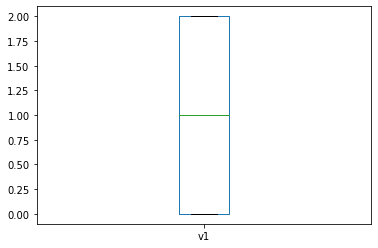

In [11]:
data["v1"].plot.box()

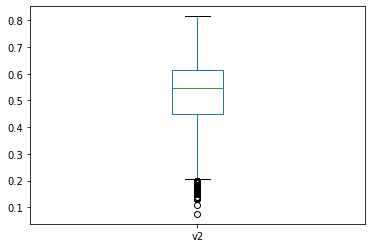

In [12]:
data["v2"].plot.box()

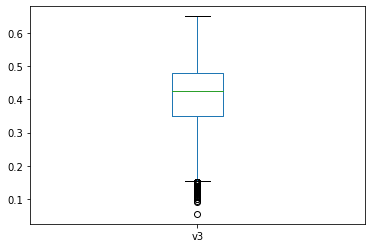

In [13]:
data["v3"].plot.box()

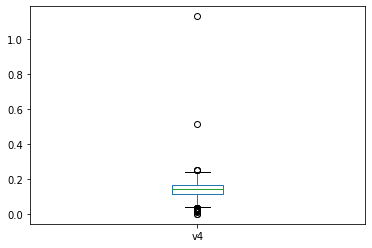

In [14]:
data["v4"].plot.box()

In [15]:
#Removing outliers by zscore
from scipy.stats import zscore
import numpy as np
z=abs(zscore(data))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [16]:
thresholds=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [17]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,v1,v2,v3,v4,v5,v6,v7,v8,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
from sklearn.preprocessing import normalize
data_new=normalize(data_new)

In [19]:
data_new=pd.DataFrame(data_new)
data_new.head()

,0,1,2,3,4,5,6,7,8
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897,0.989724
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591,0.959095
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182,0.993498
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149,0.977334
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760,0.987632


In [20]:
print(data.shape)
print(data_new.shape)

(4177, 9)
(4027, 9)


In [21]:
data_new.skew()

0    0.058374
1   -0.150085
2   -0.127636
3    0.078164
4    0.357457
5    0.517000
6    0.477689
7    0.292346
8   -2.145454
dtype: float64

# Visualization

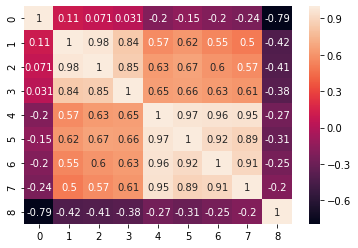

In [22]:
sns.heatmap(data_new.corr(),annot=True)

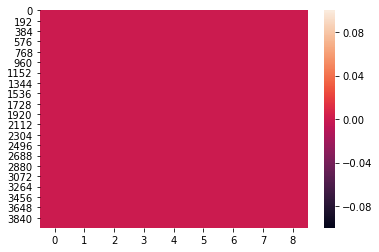

In [23]:
sns.heatmap(data_new.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001828D1ED7F0>,
      dtype=object)

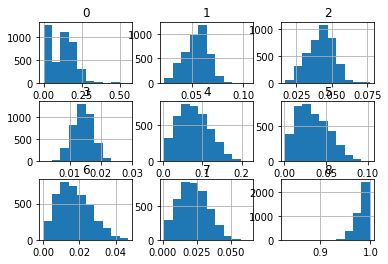

In [24]:
data_new.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001828D69B400>,
      dtype=object)

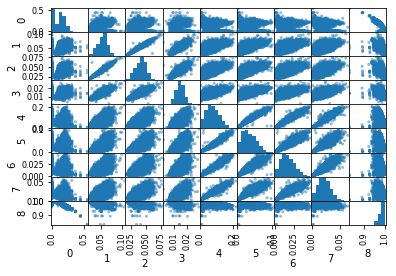

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)

In [26]:
df=pd.DataFrame(data_new)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897,0.989724
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591,0.959095
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182,0.993498
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149,0.977334
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760,0.987632


# Splitting the data into x and y

In [27]:
x=df.drop(8,axis=1)
x.head()

,0,1,2,3,4,5,6,7
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760


In [28]:
y=df[8]
y.head()

0    0.989724
1    0.959095
2    0.993498
3    0.977334
4    0.987632
Name: 8, dtype: float64

In [29]:
x.skew()

0    0.058374
1   -0.150085
2   -0.127636
3    0.078164
4    0.357457
5    0.517000
6    0.477689
7    0.292346
dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=43)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3181, 8)
(846, 8)
(3181,)
(846,)


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=r_state)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 43 is 0.8894235104111076


In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.8374584610007172

In [34]:
#max r2 score we get at random state=20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
lm.score(x_train,y_train)

0.8422933225556526

In [35]:
lm.coef_

array([-0.12247195, -0.11834087,  0.11208272, -0.39074311, -0.13744729,
       -0.01300629, -0.06682506,  0.14475745])

In [36]:
lm.intercept_

1.0119242360925984

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.8024324035789931
RMSE is: 0.005825687785477813


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [39]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
print('mean squared errror is',)
np.sqrt(mean_squared_error(y_test,rfc.predict(x_test)))

mean squared errror is


0.0013041677211318799

In [40]:
cv=cross_val_score(rfc,x_train,y_train,scoring='r2',cv=10)
cv.std()
cv.mean()

0.9894245366552197

In [41]:
params=[{
            
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(rfc,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
gc.best_score_

0.9622277198209965

In [43]:
#save the model
from sklearn.externals import joblib
joblib.dump(rfc,"Abalone.pkl")

['Abalone.pkl']